# Kernel - Spectral Analysis

Below is code written to preform spectral analysis on the eigenvalues and eigenvectors derived from the kernel matrix generated during training.

In [47]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Imports

In [48]:
# imports
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import os

import re

# import data class
from utilities.dataset_utils import DiabetesData

from qiskit_machine_learning.algorithms import QSVC

from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

# explainability imports

# qiskit imports
# simulator
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as Sampler

In [49]:
np.random.seed(42)  # reproducibility

Dataset loading - change code hear to analyze different dataset

**N.B.** works only for binary classification datasets

In [50]:
# path to diabetes.csv
path = os.path.join(os.getcwd(), '..', '..', '..', 'utilities', 'diabetes.csv')
# load dataset class
dataset = DiabetesData(path)

In [51]:
# path to diabetes.csv
path = os.path.join(os.getcwd(), '..', '..', '..', 'models', 'qml-simulator', 'qsvc_best_params.model')

qsvc = QSVC.load(path)

In [52]:
# list of feature names
feature_names = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age"
]

In [53]:
y_train_balanced = np.array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [54]:
# setup backend simulator
backend = AerSimulator()
backend.set_options(max_parallel_threads=os.cpu_count(), method='statevector')

In [55]:
# sampler
sampler = Sampler.from_backend(backend)

In [56]:
# path to kernel matrix evaluation output
path = os.path.join(os.getcwd(), '..', '..', '..', 'utilities', 'kernel_matrix_train.txt')

with open(path, 'r') as f:
    lines = f.readlines()

In [57]:
# regex pattern to extract the kernel matrix
pattern = r'Kernel val for pair\s*\((\d+),\s*(\d+)\):\s*([\d\.]+)'

In [58]:
# get matrix size
max_index = 0
for line in lines:
    match = re.search(pattern, line)
    if match:
        i = int(match.group(1))
        j = int(match.group(2))
        max_index = max(max_index, i, j)

In [59]:
# init matrix
n = max_index + 1

K = np.zeros((n, n))

In [60]:
# fill matrix with values from file
for line in lines:
    match = re.search(pattern, line)
    if match:
        i = int(match.group(1))
        j = int(match.group(2))
        val = float(match.group(3))
        K[i, j] = val

In [61]:
K

array([[1.        , 0.03417969, 0.19824219, ..., 0.17285156, 0.21582031,
        0.26171875],
       [0.02929688, 1.        , 0.171875  , ..., 0.20703125, 0.25      ,
        0.09472656],
       [0.16992188, 0.19824219, 1.        , ..., 0.27832031, 0.29394531,
        0.17382812],
       ...,
       [0.19140625, 0.22558594, 0.26660156, ..., 1.        , 0.21289062,
        0.05664062],
       [0.21679688, 0.27246094, 0.31835938, ..., 0.203125  , 1.        ,
        0.40136719],
       [0.29394531, 0.10644531, 0.18945312, ..., 0.06152344, 0.40332031,
        1.        ]])

In [62]:
# symmetrize matrix
if not np.allclose(K, K.T):
    K = (K + K.T) / 2

In [63]:
# get eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(K)
# sort eigenvalues
indices = eigenvalues.argsort()[::-1]
sorted_eigenvalues = eigenvalues[indices]
sorted_eigenvectors = eigenvectors[:, indices]

### 1) Eigenvalue Spectrum Analysis

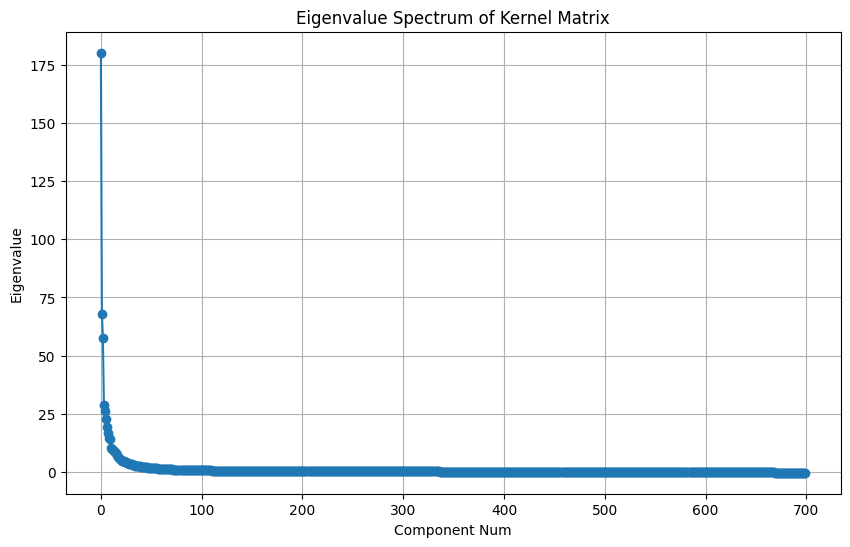

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues, marker='o')
plt.title("Eigenvalue Spectrum of Kernel Matrix")
plt.xlabel("Component Num")
plt.ylabel("Eigenvalue")
#plt.yscale('log')
plt.grid()
plt.show()

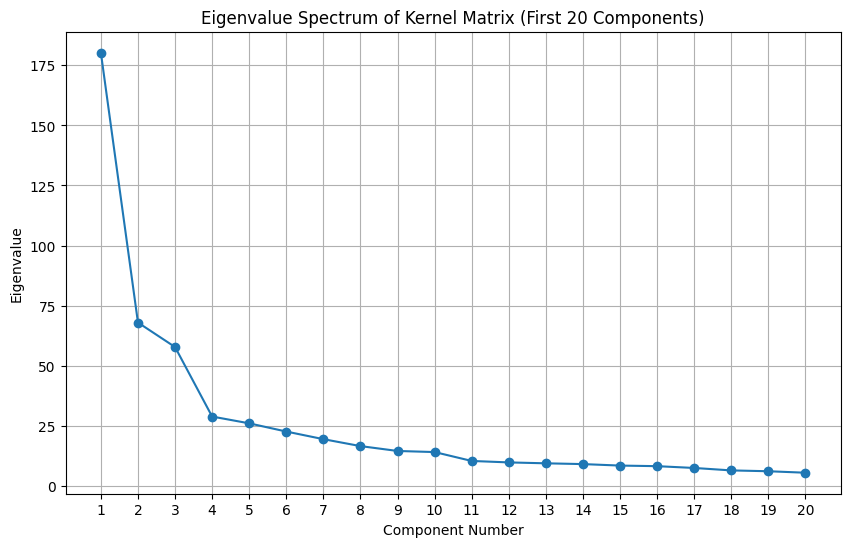

In [65]:
num_comps = 20

eigenvalues_to_plot = sorted_eigenvalues[:num_comps]
components = np.arange(1, num_comps + 1)

plt.figure(figsize=(10, 6))
plt.plot(components, eigenvalues_to_plot, marker='o')
plt.title(f"Eigenvalue Spectrum of Kernel Matrix (First {num_comps} Components)")
plt.xlabel("Component Number")
plt.ylabel("Eigenvalue")
plt.xticks(components)
plt.grid()
plt.show()


### Cumulative Explained Variance

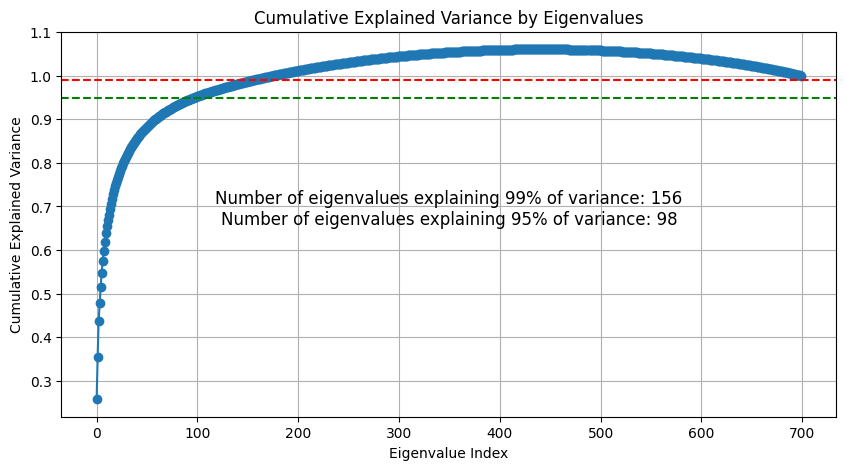

In [66]:
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
explained_variance = np.cumsum(explained_variance)
# plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(explained_variance, marker='o')
plt.axhline(y=0.99, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')

plt.title('Cumulative Explained Variance by Eigenvalues')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
# print number of eigenvalues that explain 99% of the variance
n_eigenvalues_99 = np.sum(explained_variance <= 0.99)
n_eigenvalues_95 = np.sum(explained_variance <= 0.95)
plt.annotate(f'Number of eigenvalues explaining 99% of variance: {n_eigenvalues_99}\nNumber of eigenvalues explaining 95% of variance: {n_eigenvalues_95}', xy=(0.5, 0.5), xycoords='axes fraction', fontsize=12, ha='center')

plt.show()



### Kernel PCA Projection

In [67]:
# Project points represented by K onto the first 3 principal components
comps_3d = 3
alphas_3d = np.real(sorted_eigenvectors[:, :comps_3d]) / np.sqrt(np.real(sorted_eigenvalues[:comps_3d]))
proj_data_3d = K @ alphas_3d

In [68]:
class_colors_map = {0: 'blue', 1: 'red'}
colors_by_class = np.array([class_colors_map[label] for label in y_train_balanced])
labels_by_class = np.array([f'Class {label}' for label in y_train_balanced])

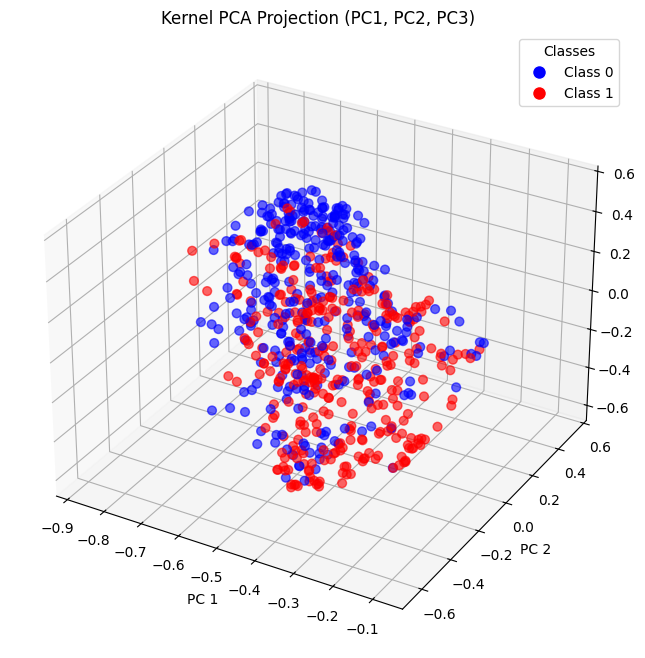

In [76]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    proj_data_3d[:, 0],
    proj_data_3d[:, 1],
    proj_data_3d[:, 2],
    c=colors_by_class,
    s=40,
    alpha=0.6
)

ax.set_title("Kernel PCA Projection (PC1, PC2, PC3)")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")

# Create legend manually for classes
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Class 0',
                          markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Class 1',
                          markerfacecolor='red', markersize=10)]
ax.legend(handles=handles, title="Classes")

plt.show()

In [70]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels_kmeans = kmeans.fit_predict(proj_data_3d)

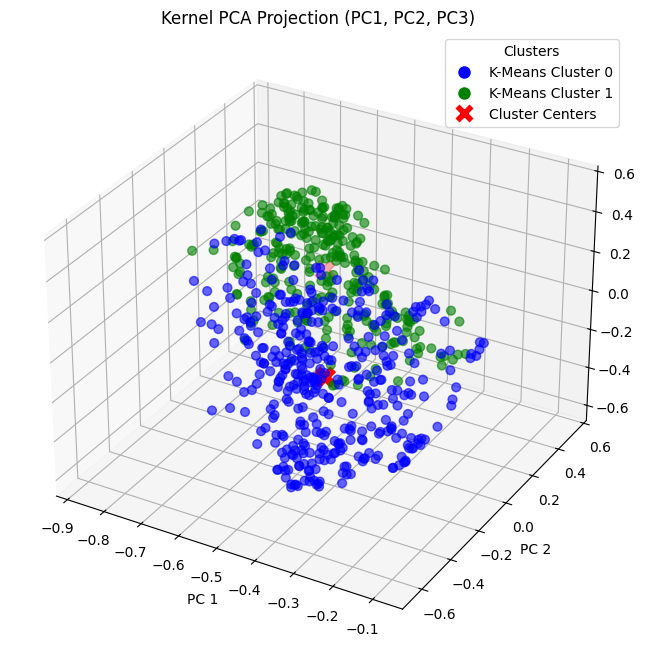

In [75]:
fig_kmeans = plt.figure(figsize=(10, 8))
ax_kmeans = fig_kmeans.add_subplot(111, projection='3d')

# Define colors for K-Means clusters
kmeans_colors_map = {0: 'blue', 1: 'green'}
colors_by_kmeans = np.array([kmeans_colors_map[label] for label in cluster_labels_kmeans])

# Scatter plot colored by K-Means cluster ID
scatter_kmeans = ax_kmeans.scatter(
    proj_data_3d[:, 0],  # PC1
    proj_data_3d[:, 1],  # PC2
    proj_data_3d[:, 2],  # PC3
    c=colors_by_kmeans,  # Use colors based on K-Means labels
    s=40,
    alpha=0.6
)

# Plot cluster centers
centers = kmeans.cluster_centers_
ax_kmeans.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='X',
                  s=200, c='red', label='Cluster Centers', depthshade=True)


ax_kmeans.set_title('Kernel PCA Projection (PC1, PC2, PC3)')
ax_kmeans.set_xlabel("PC 1")
ax_kmeans.set_ylabel("PC 2")

# Create legend manually for K-Means clusters
handles_kmeans = [plt.Line2D([0], [0], marker='o', color='w', label='K-Means Cluster 0',
                              markerfacecolor='blue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='K-Means Cluster 1',
                              markerfacecolor='green', markersize=10),
                   plt.Line2D([0], [0], marker='X', color='w', label='Cluster Centers',
                              markerfacecolor='red', markersize=15)]
ax_kmeans.legend(handles=handles_kmeans, title="Clusters")

plt.show()

In [72]:
df_analysis = pd.DataFrame({
    'KMeans_Cluster': cluster_labels_kmeans,
    'Actual_Balanced_Class': y_train_balanced # Use balanced y_train
})

# Calculate the distribution of actual balanced classes within each cluster
class_distribution = df_analysis.groupby('KMeans_Cluster')['Actual_Balanced_Class'].value_counts(normalize=True).unstack().fillna(0) * 100

print("--- Actual Balanced Class Distribution (%) within each K-Means Cluster ---")
print(class_distribution)
print("\n" + "="*60 + "\n")

--- Actual Balanced Class Distribution (%) within each K-Means Cluster ---
Actual_Balanced_Class          0          1
KMeans_Cluster                             
0                      35.427136  64.572864
1                      69.205298  30.794702




In [73]:
comps_to_calc = 4 # We need the first 4 components to plot PC1, PC2, PC4
# Ensure we don't request more components than available
comps_to_calc = min(comps_to_calc, K.shape[0])

# Calculate projection vectors (alphas) for the first 'comps_to_calc' components
alphas_N = np.real(sorted_eigenvectors[:, :comps_to_calc]) / np.sqrt(np.real(sorted_eigenvalues[:comps_to_calc]))

# Project the data (Kernel matrix) onto these components
proj_data_N = K @ alphas_N # Shape will be (n_samples, comps_to_calc), e.g., (700, 4)

print(f"Projected data shape ({comps_to_calc}D): {proj_data_N.shape}")

Projected data shape (4D): (700, 4)


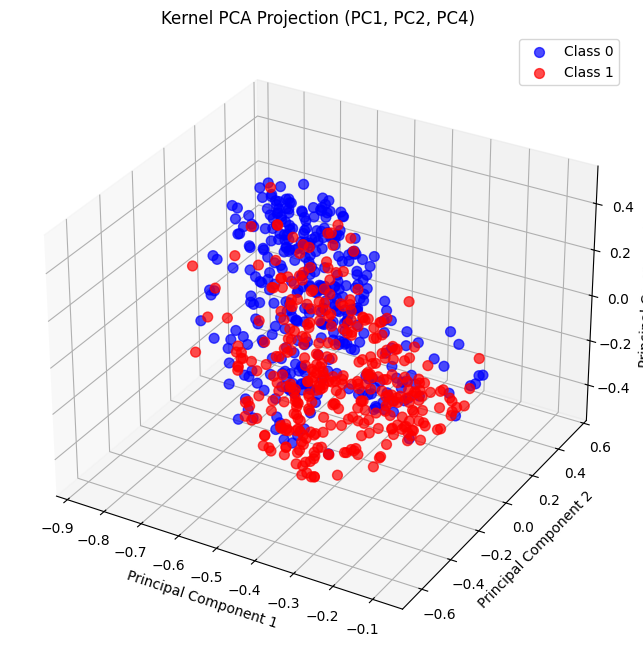

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define which components to plot on which axis (0-based index)
pc_x_idx = 0 # PC1
pc_y_idx = 1 # PC2
pc_z_idx = 3 # PC4

for label_val, color in class_colors_map.items():
    indices = (y_train_balanced == label_val)
    # Use proj_data_N and select columns for PC1, PC2, and PC4
    ax.scatter(proj_data_N[indices, pc_x_idx],
               proj_data_N[indices, pc_y_idx],
               proj_data_N[indices, pc_z_idx], # Changed from index 2 to 3
               c=color, label=f'Class {label_val}', s=50, alpha=0.7)

# Update labels and title
ax.set_xlabel(f'Principal Component {pc_x_idx + 1}') # PC1
ax.set_ylabel(f'Principal Component {pc_y_idx + 1}') # PC2
ax.set_title(f'Kernel PCA Projection (PC1, PC2, PC4)') # Updated title

ax.legend()
ax.grid(True)
plt.show()
# --- End Modification ---